In [17]:
from mdptoolbox import mdp
import numpy as np
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import random
import  hiive.mdptoolbox.mdp as hmdp
import itertools
import hiplot as hip

In [18]:
def get_knapsack_mdp(weights,rewards,max_capacity,p_next_state=1):
    n_states=max_capacity+2 #one state for each capacity plus 0 + 1 for over capacity
    n_actions=len(weights)
    p=np.zeros([n_actions,n_states,n_states])
    r=np.zeros([n_actions,n_states,n_states])
    for a in range(n_actions):
        for s in range(n_states):
            next_state=min(s+weights[a],n_states-1)
            p[a,s,:]=(1-p_next_state)/(n_states-1)
            p[a,s,next_state]=p_next_state
            r[a,s,:]=rewards[a]
            r[a,s,n_states-1]=0
    return(p,r)

def solve_mdp(p,r,discount,method,epsilon=0.01,prob=1):
    if method=='policy_iteration':
        pi=mdp.PolicyIteration(p,r,discount)
    elif method=='value_iteration':
        pi=mdp.ValueIteration(p,r,discount,epsilon)
    else: 
        print('Invalid Method Selected')
    pi.run()
    result=pd.DataFrame(data={'method':[method],'policy':[pi.policy],'v':[pi.V],'best_value':[pi.V[0]],'n_iter':[pi.iter],'cpu_time':[pi.time],'epsilon':[epsilon],'discount':[discount],'n_states':[len(p[0])],'p_target':[prob]})
    return(result)


weights=[1,1,4,4,15,15,30,30,50]
rewards=[1,2,1,12,49,50,50,120,150]
max_capacity=149
p,r=get_knapsack_mdp(weights,rewards,max_capacity,1)

p_default=p
r_default=r

result=pd.concat([solve_mdp(p_default,r_default,0.999,method) for method in ['policy_iteration','value_iteration']])
result.to_csv('results/knapsack_deterministic.csv')

result[['method','best_value','n_iter','cpu_time']]



evaluate_policy(result.iloc[0]['policy'],p_default,r_default)

(570.0, [0, 7, 7, 7, 7, 5, 3, 3, 3, 1, 1, 0])

In [61]:
weights_alt=[1,1,4,4,15,15,30,30,50]
rewards_alt=[5,4,12,1,30,29,45,44,50]
max_capacity=149
p_alt,r_alt=get_knapsack_mdp(weights_alt,rewards_alt,max_capacity,1)

result_alt=pd.concat([solve_mdp(p_alt,r_alt,0.999,method) for method in ['policy_iteration','value_iteration']])
result_alt[['method','best_value','n_iter','cpu_time']]


method  best_value  n_iter  cpu_time
0  policy_iteration  692.475562     147  0.206648
0   value_iteration  692.475562     150  0.015629

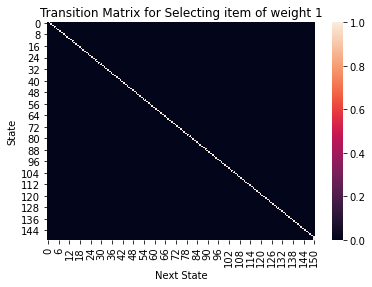

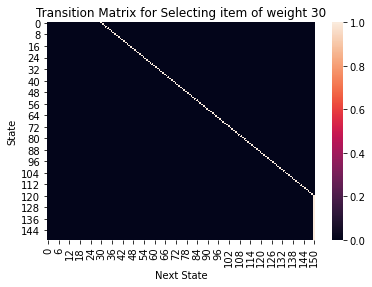

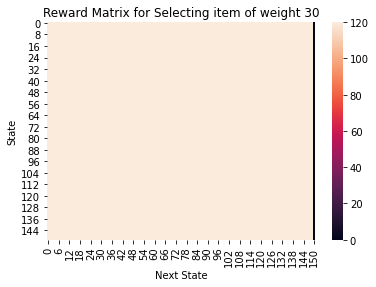

In [59]:
sns.heatmap(p_default[0])
plt.title('Transition Matrix for Selecting item of weight 1')
plt.ylabel('State')
plt.xlabel('Next State')
plt.show()

sns.heatmap(p_default[7])
plt.title('Transition Matrix for Selecting item of weight 30')
plt.ylabel('State')
plt.xlabel('Next State')
plt.show()

sns.heatmap(r_default[7])
plt.title('Reward Matrix for Selecting item of reward 120')
plt.ylabel('State')
plt.xlabel('Next State')
plt.show()

In [23]:
# Test 1, best convergence for value iteration
epsilons=[1,5,10,100,1000,10000,50000,100000,130000,149600,1000000]
results=pd.concat([solve_mdp(p_default,r_default,0.999,'value_iteration',epsilon) for epsilon in epsilons])

results[['epsilon','best_value','n_iter','cpu_time']]

epsilon  best_value  n_iter  cpu_time
0        1  568.831459      11  0.010993
0        5  568.831459      11  0.003994
0       10  568.831459      11  0.002002
0      100  568.831459      11  0.002000
0     1000  568.831459      11  0.003000
0    10000  566.849387       9  0.001004
0    50000  529.080780       5  0.000994
0   100000  509.280480       4  0.000000
0   130000  419.610120       3  0.001002
0   149600  299.850000       2  0.000000
0  1000000  150.000000       1  0.000000

In [80]:
# Impact of Discount on PI and DI
discounts=[0.999,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
results=pd.concat([solve_mdp(p_default,r_default,discount,method) for discount in discounts for method in ['policy_iteration','value_iteration']])
results

method                                             policy  \
0  policy_iteration  (7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...   
0   value_iteration  (7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0  policy_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
0   value_iteration  (8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   

                                                   v  best_value  n_iter  \
0  (568.8314586211013, 566.8493867888495, 564.865...  568.831459       5   
0  (568.8314586211013, 566.8493867888495, 564.865...  568.831459      11   
0  (393.611648, 393.08736000000005, 390.754278400...  393.611648       4   
0  (393.61164800000006, 393.08736, 390.7542784000...  393.611648      10   
0  (339.09333799999996, 338.85803999999996, 337.5...  339.093338       4   
0  (339.09333799999996, 338.85803999999996, 337.5...  339.093338       9   
0  (295.5552, 294.508032, 294.41472, 294.25919999...  295.555200       3   
0  (295.5552, 294.50803199999996, 294.41472, 294....  295.555200       9   
0  (262.0, 261.46875, 261.4375, 261.375, 261.25, ...  262.000000       2   
0  (262.0, 261.46875, 261.4375, 261.375, 261.25, ...  262.000000       9   
0  (232.7072, 232.479872, 232.47168000000002, 232...  232.707200       2   
0  (232.7072, 232.479872, 232.47168, 232.4512, 23...  232.707200       7   
0  (207.2472, 207.172518, 207.17106, 207.1662, 20...  207.247200       2   
0  (207.2472, 207.172518, 207.17106, 207.1662, 20...  207.247200       7   
0  (185.2192, 185.203968, 185.20384, 185.2032, 18...  185.219200       1   
0  (185.2192, 185.2032, 185.2032, 185.2032, 185.2...  185.219200       5   
0  (166.2512, 166.250222, 166.25022, 166.2502, 16...  166.251200       1   
0  (166.25, 166.25, 166.25, 166.25, 166.25, 166.2...  166.250000       4   

   cpu_time  epsilon  discount  
0  0.027165     0.01     0.999  
0  0.010504     0.01     0.999  
0  0.024980     0.01     0.800  
0  0.000000     0.01     0.800  
0  0.009408     0.01     0.700  
0  0.000000     0.01     0.700  
0  0.000000     0.01     0.600  
0  0.016891     0.01     0.600  
0  0.000000     0.01     0.500  
0  0.015721     0.01     0.500  
0  0.015626     0.01     0.400  
0  0.000000     0.01     0.400  
0  0.018118     0.01     0.300  
0  0.000000     0.01     0.300  
0  0.000000     0.01     0.200  
0  0.000000     0.01     0.200  
0  0.000000     0.01     0.100  
0  0.000000     0.01     0.100

In [19]:
# Impact of problem size on PI and DI
def get_random_knapsack_problem(problem_size):
    weights=[random.randint(1,problem_size) for i in range(0,problem_size)]
    rewards=[random.randint(1,problem_size*3) for i in range(0,problem_size)]
    max_capacity=round(sum(weights)*0.8)
    return(weights,rewards,max_capacity)

problem_sizes=[5,10,15,20,25]*20
probabilities=[1,0.75,0.5,0.25,0]
random_problems=[get_random_knapsack_problem(problem_size) for problem_size in problem_sizes]
random_knapsack_mdps=[get_knapsack_mdp(random_problem[0],random_problem[1],random_problem[2],probability) for random_problem in random_problems for probability in probabilities]


results=pd.concat([solve_mdp(mdp[0],mdp[1],0.999,method) for mdp in random_knapsack_mdps for method in ['policy_iteration','value_iteration']])
results.to_csv('results/knapsack_probsize.csv')



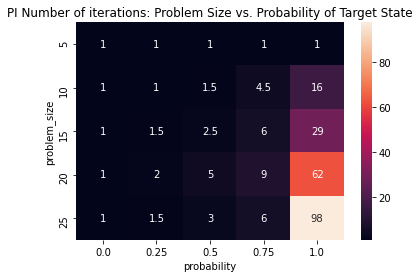

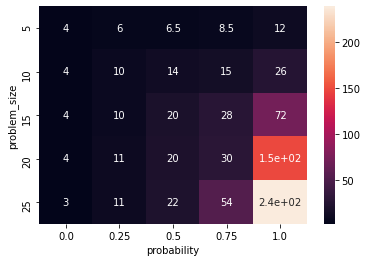

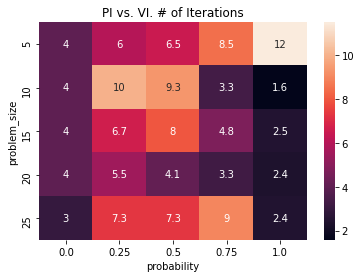

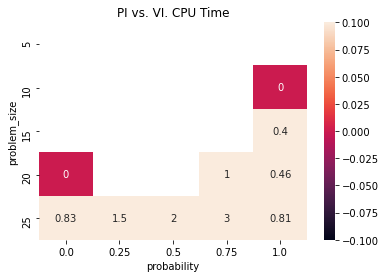

In [343]:
results=pd.read_csv('results/knapsack_probsize.csv')
params=pd.concat([pd.DataFrame(data={'problem_size':[problem_size],'probability':[probability]}) for problem_size in problem_sizes for probability in probabilities for method in ['policy_iteration','value_iteration']])
results['problem_size']=params['problem_size'].values
results['probability']=params['probability'].values

results_grouped=results.groupby(['method','problem_size','probability'])[['best_value','n_iter','cpu_time']].median().reset_index()
pi_results=results_grouped[results_grouped['method']=='policy_iteration']
vi_results=results_grouped[results_grouped['method']=='value_iteration']

# pi_results

sns.heatmap(pi_results.pivot(index='problem_size',columns='probability',values='n_iter'),annot=True)
plt.title("PI Number of iterations: Problem Size vs. Probability of Target State")
plt.show()
sns.heatmap(vi_results.pivot(index='problem_size',columns='probability',values='n_iter'),annot=True)
plt.show()

results_diff=pd.merge(pi_results,vi_results,how='inner',left_on=['probability','problem_size'],right_on=['probability','problem_size'])
results_diff['cpu_diff']=results_diff['cpu_time_y']/results_diff['cpu_time_x']
results_diff['n_iter_diff']=results_diff['n_iter_y']/results_diff['n_iter_x']

sns.heatmap(results_diff.pivot(index='problem_size',columns='probability',values='n_iter_diff'),annot=True)
plt.title('PI vs. VI. # of Iterations')
plt.show()
sns.heatmap(results_diff.pivot(index='problem_size',columns='probability',values='cpu_diff'),annot=True)
plt.title('PI vs. VI. CPU Time')
plt.show()

In [20]:
# Q-Learning
def evaluate_policy(policy,p,r):
    rewards=0
    state=0
    best_sequence=[state]
    while state<len(policy)-1:
        action=policy[state]
        best_sequence.append(action)
        next_state_p=p[action][state]
        next_state=next_state_p.argmax()
        rewards+=r[action][state][next_state]
        state=next_state

    return(rewards,best_sequence)

def run_q(n_iter,epsilon,epsilon_decay,alpha,p,r,discount):
    print(str(n_iter)+'-'+str(epsilon)+'-'+str(epsilon_decay)+'-'+str(alpha))
    start=time.time()
    q=hmdp.QLearning(p,r,discount,n_iter=n_iter,epsilon=epsilon,epsilon_decay=epsilon_decay, alpha=alpha)
    q.run()
    end=time.time()
    rewards,best_sequence=evaluate_policy(q.policy,p,r)
    return(pd.DataFrame(data={'n_iter':[n_iter],'epsilon':[epsilon],'epsilon_decay':[epsilon_decay],'alpha':[alpha],'true_policy_value':[rewards],'fit_time':[end-start],'best_sequence':[best_sequence]}))


epsilons=[0.1,0.2,0.3,0.4,0.5]
epsilon_decays=[0.9,0.95,0.99,0.999]
alphas=[0.9,0.95,0.99,0.999]

results1=pd.concat([run_q(50000,epsilon,epsilon_decay,alpha,p_default,r_default,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results1.to_csv('results/knapsack_rl_1.csv')

results2=pd.concat([run_q(100000,epsilon,epsilon_decay,alpha,p_default,r_default,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results2.to_csv('results/knapsack_rl_2.csv')

results3=pd.concat([run_q(250000,epsilon,epsilon_decay,alpha,p_default,r_default,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results3.to_csv('results/knapsack_rl_3.csv')

results4=pd.concat([run_q(500000,epsilon,epsilon_decay,alpha,p_default,r_default,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results4.to_csv('results/knapsack_rl_4.csv')

results5=pd.concat([run_q(1000000,epsilon,epsilon_decay,alpha,p_default,r_default,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results5.to_csv('results/knapsack_rl_5.csv')

In [6]:
all_results=pd.concat([pd.read_csv('results/knapsack_rl_1.csv'),pd.read_csv('results/knapsack_rl_2.csv'),pd.read_csv('results/knapsack_rl_3.csv'),pd.read_csv('results/knapsack_rl_4.csv')])
all_results['alpha']=round(all_results['alpha'],3)
all_results['epsilon_decay']=round(all_results['alpha'],3)
all_results['error']=(568-all_results['true_policy_value'])/568
iter_alpha_sensitivity=all_results.groupby(['n_iter','alpha'])['error'].mean().reset_index()
epsilon_sensitivity=all_results.groupby(['epsilon','epsilon_decay'])['error'].mean().reset_index()
iter_eps_sensitivity=all_results.groupby(['n_iter','epsilon'])['error'].mean().reset_index()


sns.heatmap(iter_alpha_sensitivity.pivot(index='n_iter',columns='alpha',values='error'),annot=True)
plt.title('% Error Sensitivity: Iterations vs. Learning Rate')
plt.show()
sns.heatmap(epsilon_sensitivity.pivot(index='epsilon',columns='epsilon_decay',values='error'),annot=True)
plt.title('% Error Sensitivity: Epsilon vs.Decay')
plt.show()

sns.heatmap(iter_eps_sensitivity.pivot(index='n_iter',columns='epsilon',values='error'),annot=True)
plt.title('% Error Sensitivity: Epsilon vs.Decay')
plt.show()

all_results.sort_values(by=['error']).iloc[0]['best_sequence']

weights=[1,1,4,4,15,15,30,30,50]
rewards=[1,2,1,12,49,50,50,120,150]



'[0, 7, 7, 7, 0, 7, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]'

In [14]:

# helper
def get_state_dicts(weights,max_item_exploit,max_capacity):
    states=list(itertools.product(*[range(max_item_exploit+1) for i in range(len(weights))]))
    state_dict={}
    state_dict_rev={}
    terminal_state_index=len(states)-1
    state_index=0
    for i in range(len(states)):
        if get_used_capacity(states[i],weights)<max_capacity:
            state_dict[states[i]]=state_index
            state_dict_rev[state_index]=states[i]
            state_index+=1
        else:
            state_dict[states[i]]=terminal_state_index
    
    new_terminal_state_index=state_index
    for key in state_dict:
        if state_dict[key]==terminal_state_index:
            state_dict[key]=new_terminal_state_index
    
    state_dict_rev[new_terminal_state_index]=-1  
    return((state_dict,state_dict_rev))

def get_reward_of_state(state,rewards):
    reward=0
    for i in range(len(state)):
        reward+=state[i]*rewards[i]
    return(reward)

def get_pr_of_action(p,r,state_dict,state_dict_rev,weights,rewards,max_item_exploit,action,max_capacity,p_next_state):
    for i in range(len(p)):
        state=state_dict_rev[i] # decode state
        if state==-1: # if terminal state
            reward=0 
        else:
            state=list(state)
            next_state=state.copy()
            next_state[action]=next_state[action]+1 if next_state[action]<max_item_exploit  else state[action] # calculate next state
            reward = get_reward_of_state(state,rewards) if get_used_capacity(next_state,weights)>=max_capacity else 0

        next_state_index=state_dict[tuple(next_state)] if state!=-1 else i # get index of next state
        p[i][:]=(1-p_next_state)/(len(p[i][:])-1)
        p[i][next_state_index]=p_next_state
        r[i][next_state_index]=reward
    return(p,r)
                
def get_used_capacity(state,weights):
    capacity=0
    for i in range(len(state)):
        capacity+=state[i]*weights[i]
    return capacity


def get_modified_knapsack_mdp(weights,rewards,max_capacity,max_item_exploit,p_next_state=1):
    state_dict,state_dict_rev=get_state_dicts(weights,max_item_exploit,max_capacity)
    p=np.zeros([len(weights),len(state_dict_rev),len(state_dict_rev)])
    r=np.zeros([len(weights),len(state_dict_rev),len(state_dict_rev)])
    for i in range(len(weights)):
        p[i],r[i]=get_pr_of_action(p[i],r[i],state_dict,state_dict_rev,weights,rewards,max_item_exploit,i,max_capacity,p_next_state)

    return(p,r)


def get_optimal_sequence(policy,weights,rewards,max_capacity,max_item_exploit=3):
    state_dict,state_dict_rev=get_state_dicts(weights,max_item_exploit,max_capacity)
    sequence=[]
    state=list(np.zeros(len(weights)))
    remaining_capacity=max_capacity
    total_reward=0
    current_state_index=0
    while remaining_capacity>0:
        next_action=policy[current_state_index]
        sequence.append(next_action)
        remaining_capacity-=weights[next_action]
        if remaining_capacity>=0:
            state[next_action]+=1
            state=[int(s) for s in state]
            total_reward+=rewards[next_action]
        current_state_index=state_dict[tuple(state)]
    
    return(sequence,total_reward)
    
weights=[15,15,30,30,50]
rewards=[49,50,50,120,150]

max_capacity=149
p_default2,r_default2=get_modified_knapsack_mdp(weights,rewards,max_capacity,3,1)


weights=[1,1,4,15,15,30,30,50]
rewards=[1,2,12,49,50,50,120,150]
max_capacity=149
p_default2,r_default2=get_modified_knapsack_mdp(weights,rewards,max_capacity,3,1)

In [15]:
result=pd.concat([solve_mdp(p_default2,r_default2,0.999,method) for method in ['policy_iteration','value_iteration']])
result[['method','best_value','n_iter','cpu_time','n_states']]


method  best_value  n_iter    cpu_time  n_states
0  policy_iteration  542.544594       7  240.747711     11714
0   value_iteration  542.544594      12  153.317354     11714

In [23]:
# Impact of problem size on PI and DI
def solve_mdp_verbose(p,r,discount,method):
    print(len(p[0]))
    result=solve_mdp(mdp[0],mdp[1],0.999,method)
    return(result)

def get_reward_utility_diff(weights,rewards):
    utility=np.divide(rewards,weights)
    return(abs(rewards-utility).mean())

problem_sizes=[3,4,5,6]*20
probabilities=[1,0.8,0.75,0.5]
random_problems=[get_random_knapsack_problem(problem_size) for problem_size in problem_sizes]

problems=pd.DataFrame(data={'problem':random_problems,'reward_utility_diff':[get_reward_utility_diff(prob[0],prob[1]) for prob in random_problems]})
problems.to_csv('results/knapsack2_rl_size_diffs.csv')

random_knapsack_mdps=[get_modified_knapsack_mdp(random_problem[0],random_problem[1],random_problem[2],3,probability) for random_problem in random_problems for probability in probabilities]


results=pd.concat([solve_mdp(mdp[0],mdp[1],0.999,method) for mdp in random_knapsack_mdps for method in ['policy_iteration','value_iteration']])
results.to_csv('results/knapsack2_probsize.csv')



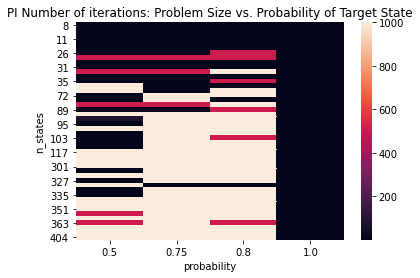

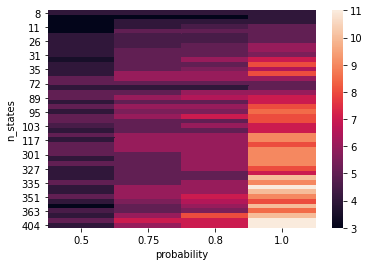

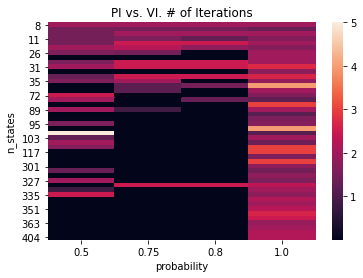

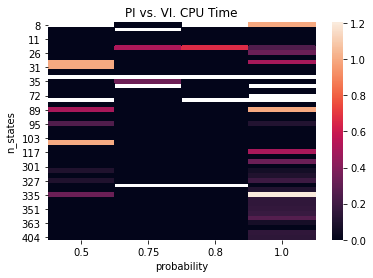

In [25]:
results=pd.read_csv('results/knapsack2_probsize.csv')
params=pd.concat([pd.DataFrame(data={'problem_size':[problem_size],'probability':[probability]}) for problem_size in problem_sizes for probability in probabilities for method in ['policy_iteration','value_iteration']])
results['probability']=params['probability'].values
results
results_grouped=results.groupby(['method','n_states','probability'])[['best_value','n_iter','cpu_time']].median().reset_index()
pi_results=results_grouped[results_grouped['method']=='policy_iteration']
vi_results=results_grouped[results_grouped['method']=='value_iteration']


# pi_results

sns.heatmap(pi_results.pivot(index='n_states',columns='probability',values='n_iter'),annot=False)
plt.title("PI Number of iterations: Problem Size vs. Probability of Target State")
plt.show()
sns.heatmap(vi_results.pivot(index='n_states',columns='probability',values='n_iter'),annot=False)
plt.show()

results_diff=pd.merge(pi_results,vi_results,how='inner',left_on=['probability','n_states'],right_on=['probability','n_states'])
results_diff['cpu_diff']=results_diff['cpu_time_y']/results_diff['cpu_time_x']
results_diff['n_iter_diff']=results_diff['n_iter_y']/results_diff['n_iter_x']

sns.heatmap(results_diff.pivot(index='n_states',columns='probability',values='n_iter_diff'),annot=False)
plt.title('PI vs. VI. # of Iterations')
plt.show()
sns.heatmap(results_diff.pivot(index='n_states',columns='probability',values='cpu_diff'),annot=False)
plt.title('PI vs. VI. CPU Time')
plt.show()



In [461]:
epsilons=[0.1,0.2,0.3,0.4,0.5]
epsilon_decays=[0.9,0.95,0.99,0.999]
alphas=[0.9,0.95,0.99,0.999]

results1=pd.concat([run_q(50000,epsilon,epsilon_decay,alpha,p_default2,r_default2,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results1.to_csv('results/knapsack2_rl_1.csv')

results2=pd.concat([run_q(100000,epsilon,epsilon_decay,alpha,p_default2,r_default2,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results2.to_csv('results/knapsack2_rl_2.csv')

results3=pd.concat([run_q(250000,epsilon,epsilon_decay,alpha,p_default2,r_default2,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results3.to_csv('results/knapsack2_rl_3.csv')

results4=pd.concat([run_q(500000,epsilon,epsilon_decay,alpha,p_default2,r_default2,0.999) for epsilon in epsilons for epsilon_decay in epsilon_decays for alpha in alphas ])
results4.to_csv('results/knapsack2_rl_4.csv')


50000-0.1-0.9-0.9
50000-0.1-0.9-0.95
50000-0.1-0.9-0.99
50000-0.1-0.9-0.999
50000-0.1-0.95-0.9
50000-0.1-0.95-0.95
50000-0.1-0.95-0.99
50000-0.1-0.95-0.999
50000-0.1-0.99-0.9
50000-0.1-0.99-0.95
50000-0.1-0.99-0.99
50000-0.1-0.99-0.999
50000-0.1-0.999-0.9
50000-0.1-0.999-0.95
50000-0.1-0.999-0.99
50000-0.1-0.999-0.999
50000-0.2-0.9-0.9
50000-0.2-0.9-0.95
50000-0.2-0.9-0.99
50000-0.2-0.9-0.999
50000-0.2-0.95-0.9
50000-0.2-0.95-0.95
50000-0.2-0.95-0.99
50000-0.2-0.95-0.999
50000-0.2-0.99-0.9
50000-0.2-0.99-0.95
50000-0.2-0.99-0.99
50000-0.2-0.99-0.999
50000-0.2-0.999-0.9
50000-0.2-0.999-0.95
50000-0.2-0.999-0.99
50000-0.2-0.999-0.999
50000-0.3-0.9-0.9
50000-0.3-0.9-0.95
50000-0.3-0.9-0.99
50000-0.3-0.9-0.999
50000-0.3-0.95-0.9
50000-0.3-0.95-0.95
50000-0.3-0.95-0.99
50000-0.3-0.95-0.999
50000-0.3-0.99-0.9
50000-0.3-0.99-0.95
50000-0.3-0.99-0.99
50000-0.3-0.99-0.999
50000-0.3-0.999-0.9
50000-0.3-0.999-0.95
50000-0.3-0.999-0.99
50000-0.3-0.999-0.999
50000-0.4-0.9-0.9
50000-0.4-0.9-0.95
500

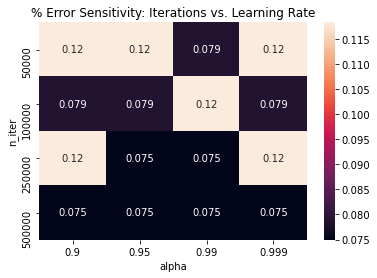

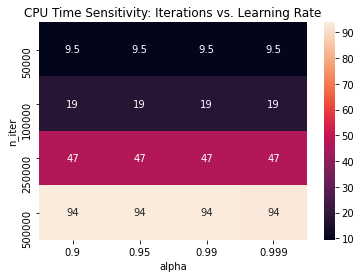

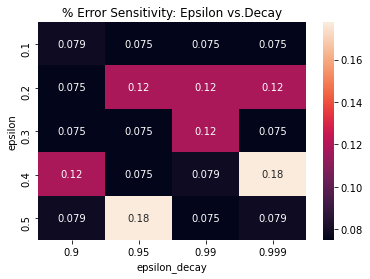

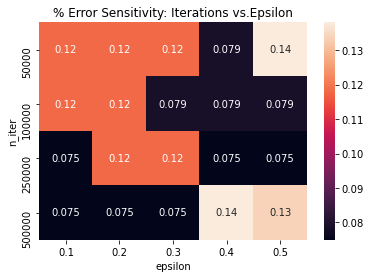

n_iter  epsilon  epsilon_decay  alpha     error   fit_time
13  250000      0.1           0.95   0.95  0.074951  46.495272
10  500000      0.1           0.99   0.99  0.074951  95.600228
70  250000      0.5           0.99   0.99  0.074951  46.515616
61  250000      0.4           0.95   0.95  0.074951  47.262590

In [31]:
all_results=pd.concat([pd.read_csv('results/knapsack2_rl_1.csv'),pd.read_csv('results/knapsack2_rl_2.csv'),pd.read_csv('results/knapsack2_rl_3.csv'),pd.read_csv('results/knapsack2_rl_4.csv')])
all_results['alpha']=round(all_results['alpha'],3)
all_results['epsilon_decay']=round(all_results['alpha'],3)
all_results['error']=(507-all_results['true_policy_value'])/507
iter_alpha_sensitivity=all_results.groupby(['n_iter','alpha'])['error'].min().reset_index()
iter_alpha_sensitivity2=all_results.groupby(['n_iter','alpha'])['fit_time'].median().reset_index()

epsilon_sensitivity=all_results.groupby(['epsilon','epsilon_decay'])['error'].min().reset_index()
iter_eps_sensitivity=all_results.groupby(['n_iter','epsilon'])['error'].min().reset_index()


sns.heatmap(iter_alpha_sensitivity.pivot(index='n_iter',columns='alpha',values='error'),annot=True)
plt.title('% Error Sensitivity: Iterations vs. Learning Rate')
plt.show()

sns.heatmap(iter_alpha_sensitivity2.pivot(index='n_iter',columns='alpha',values='fit_time'),annot=True)
plt.title('CPU Time Sensitivity: Iterations vs. Learning Rate')
plt.show()


sns.heatmap(epsilon_sensitivity.pivot(index='epsilon',columns='epsilon_decay',values='error'),annot=True)
plt.title('% Error Sensitivity: Epsilon vs.Decay')
plt.show()

sns.heatmap(iter_eps_sensitivity.pivot(index='n_iter',columns='epsilon',values='error'),annot=True)
plt.title('% Error Sensitivity: Iterations vs.Epsilon')
plt.show()

all_results.sort_values(by=['error']).iloc[0:4][['n_iter','epsilon','epsilon_decay','alpha','error','fit_time']]

In [ ]:
problem_sizes=[2,3,4,5]*5
probabilities=[1,0.8,0.75,0.5]
random_problems=[get_random_knapsack_problem(problem_size) for problem_size in problem_sizes]

def get_reward_utility_diff(weights,rewards):
    utility=np.divide(rewards,weights)
    return(abs(rewards-utility).mean())

problems=pd.DataFrame(data={'problem':random_problems,'reward_utility_diff':[get_reward_utility_diff(prob[0],prob[1]) for prob in random_problems]})
problems.to_csv('results/knapsack2_rl_size_diffs.csv')

random_knapsack_mdps1=[get_modified_knapsack_mdp(random_problem[0],random_problem[1],random_problem[2],3,probabilities[0]) for random_problem in random_problems]
random_knapsack_mdps2=[get_modified_knapsack_mdp(random_problem[0],random_problem[1],random_problem[2],3,probabilities[1]) for random_problem in random_problems]
random_knapsack_mdps3=[get_modified_knapsack_mdp(random_problem[0],random_problem[1],random_problem[2],3,probabilities[2]) for random_problem in random_problems]
random_knapsack_mdps4=[get_modified_knapsack_mdp(random_problem[0],random_problem[1],random_problem[2],3,probabilities[3]) for random_problem in random_problems]


results1=pd.concat([run_q(250000,0.1,0.95,0.95,mdp[0],mdp[1],0.999) for mdp in random_knapsack_mdps1])
results1.to_csv('results/knapsack2_rl_size1.csv')
print('next')
results1=pd.concat([run_q(250000,0.1,0.95,0.95,mdp[0],mdp[1],0.999) for mdp in random_knapsack_mdps2])
results1.to_csv('results/knapsack2_rl_size2.csv')
print('next')
results1=pd.concat([run_q(250000,0.1,0.95,0.95,mdp[0],mdp[1],0.999) for mdp in random_knapsack_mdps3])
results1.to_csv('results/knapsack2_rl_size3.csv')
print('next')
results1=pd.concat([run_q(250000,0.1,0.95,0.95,mdp[0],mdp[1],0.999) for mdp in random_knapsack_mdps4])
results1.to_csv('results/knapsack2_rl_size4.csv')


250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95
next
250000-0.1-0.95-0.95
250000-0.1-0.95-0.95


In [37]:

hiplot = hip.Experiment.from_dataframe(all_results[['n_iter','alpha','epsilon','epsilon_decay','error']])
hiplot.display()

<IPython.core.display.Javascript object>

2.5